In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
#load the data into Pandas DataFrame


# Corrected file path to match the Resources folder
Dataset = pd.read_csv('Resources/Mall_Customers.csv', index_col=0)

# Display sample data
Dataset.head(10)





,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

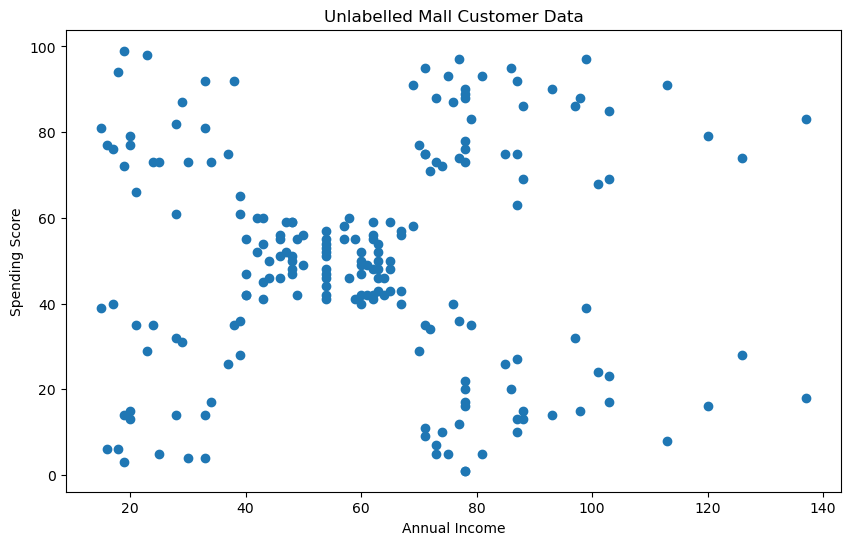

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(Dataset['Annual Income (k$)'],Dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [15]:
Training the K-Means model on Annual Income and Spending Score


SyntaxError: invalid syntax (3206734923.py, line 1)

In [ ]:

X1 = Dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values



In [6]:

from sklearn.cluster import KMeans
import pandas as pd

# Assume `Dataset` is already loaded
# Step 1: Extract relevant columns
X1 = Dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Step 2: Train the K-Means model
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X1)

# Step 3: Get cluster labels
labels = kmeans.labels_

# Step 4: Add labels to the dataset
Dataset['Cluster'] = labels

# Display updated dataset
print(Dataset.head())



            Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
CustomerID                                                                  
1             Male   19                  15                      39        2
2             Male   21                  15                      81        3
3           Female   20                  16                       6        2
4           Female   23                  16                      77        3
5           Female   31                  17                      40        2


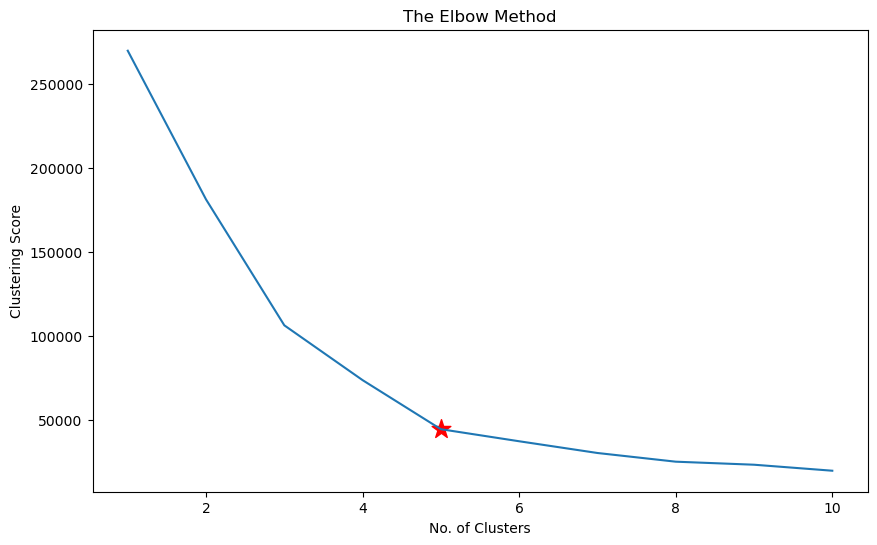

In [8]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X1)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [16]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X1)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X1)

pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [17]:
Dataset['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', Dataset['Cluster'].value_counts())
Dataset


Number of data points in each cluster= 
 Cluster
0.0    81
4.0    39
1.0    35
3.0    22
2.0    22
Name: count, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,3.0
2,Male,21,15,81,2.0
3,Female,20,16,6,3.0
4,Female,23,16,77,2.0
5,Female,31,17,40,3.0
...,...,...,...,...,...
196,Female,35,120,79,1.0
197,Female,45,126,28,4.0
198,Male,32,126,74,1.0


Text(0.5, 1.0, 'Customer Clusters')

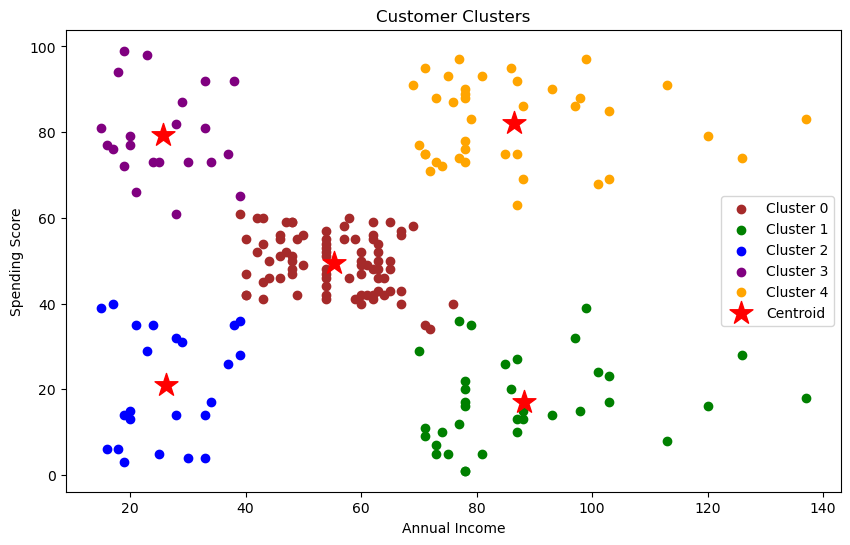

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X1[pred == 0, 0], X1[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X1[pred == 1, 0], X1[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X1[pred == 2, 0], X1[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X1[pred == 3, 0], X1[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X1[pred == 4, 0], X1[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')
